In [ ]:
 #Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pylab
import tensorflow as tf
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier ,GradientBoostingClassifier, GradientBoostingRegressor , AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import mean_absolute_error ,mean_squared_error ,r2_score
import sklearn

In [ ]:
!pip install pycaret[models]
from pycaret.regression import *


In [ ]:
#load GPU for better testing
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
    # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
        print(e)

In [ ]:
#load Data
data=pd.read_csv('/content/sample_data/AlzheimerData.txt', delimiter=',')
selectiveData=data.copy()

In [ ]:
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
clf1 = setup(data = data, target = 'motor_UPDRS', feature_selection = True)
clf1 = setup(data = data, target = 'total_UPDRS', feature_selection = True)

,Description,Value
0,Session id,5166
1,Target,motor_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 22)"
4,Transformed data shape,"(5875, 5)"
5,Transformed train set shape,"(4112, 5)"
6,Transformed test set shape,"(1763, 5)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


,Description,Value
0,Session id,7585
1,Target,total_UPDRS
2,Target type,Regression
3,Original data shape,"(5875, 22)"
4,Transformed data shape,"(5875, 5)"
5,Transformed train set shape,"(4112, 5)"
6,Transformed test set shape,"(1763, 5)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [ ]:
clf1

In [ ]:
null=pd.isnull(data).sum()
null.head

<bound method NDFrame.head of subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64>

In [ ]:
data

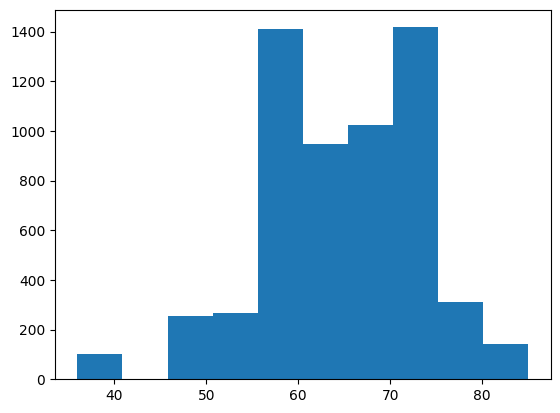

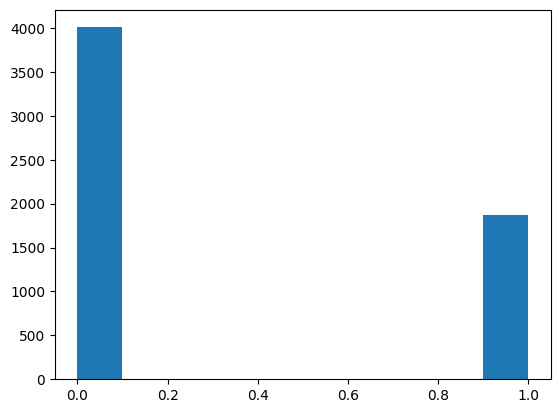

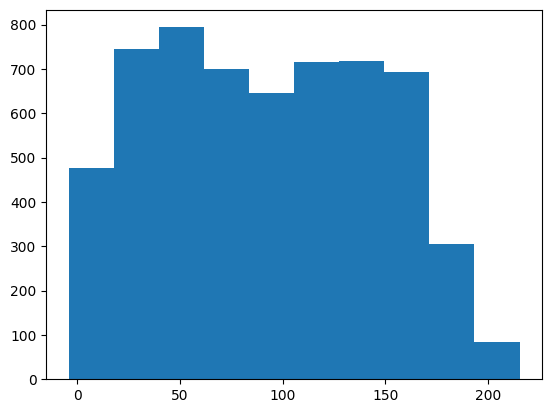

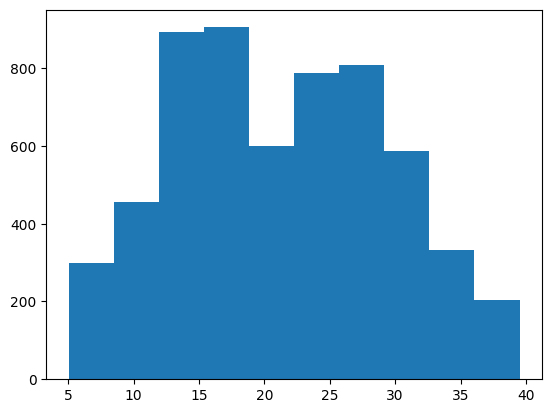

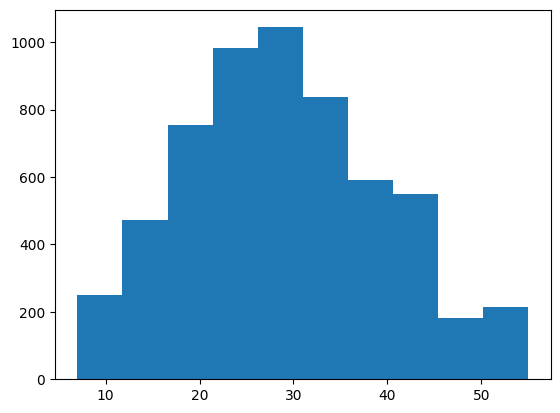

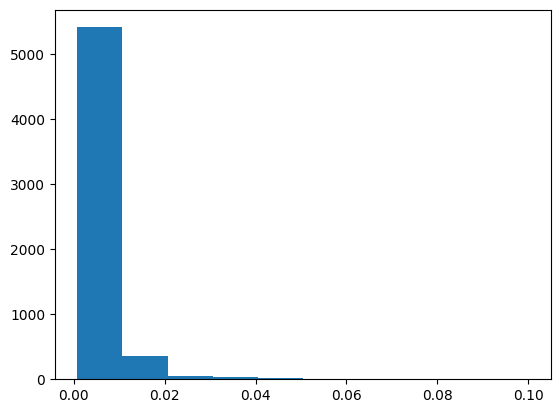

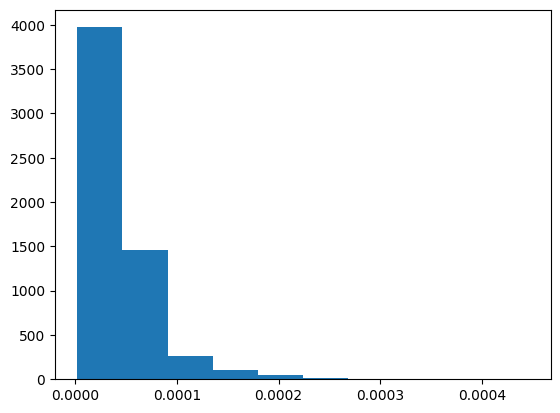

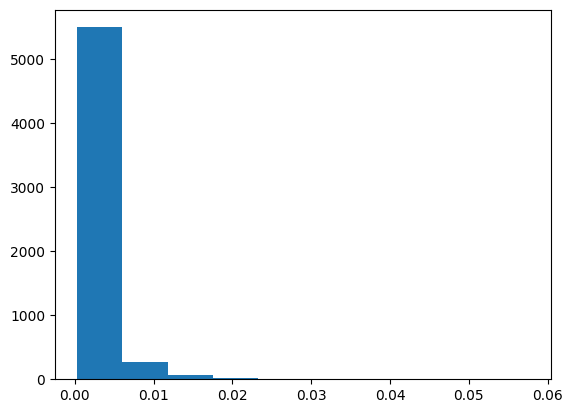

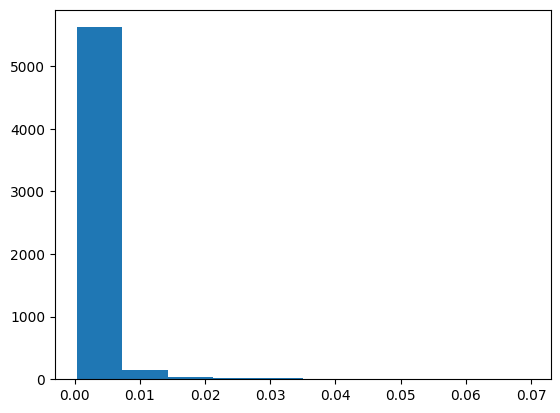

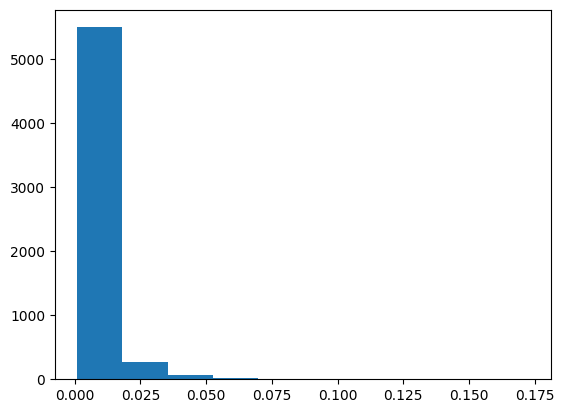

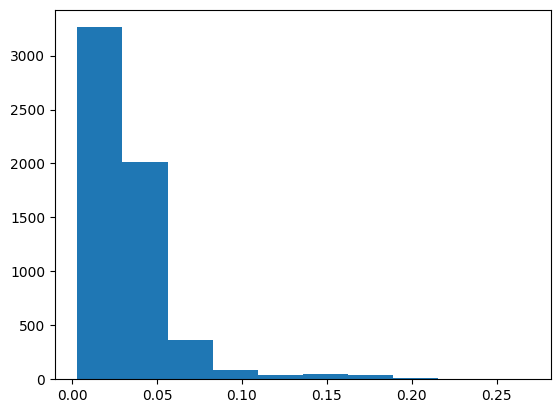

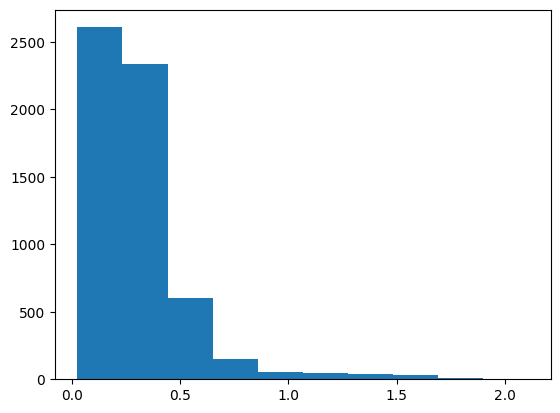

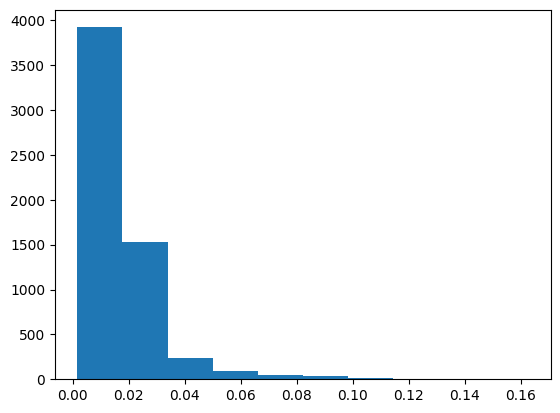

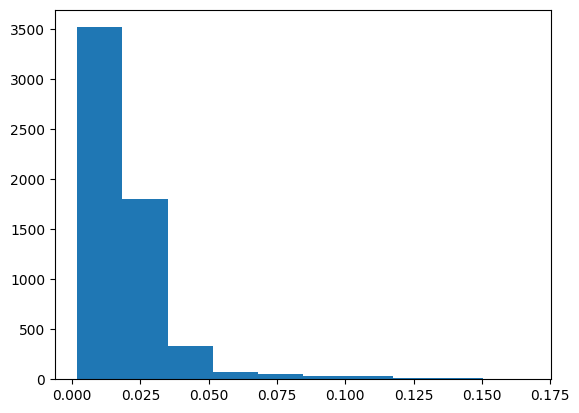

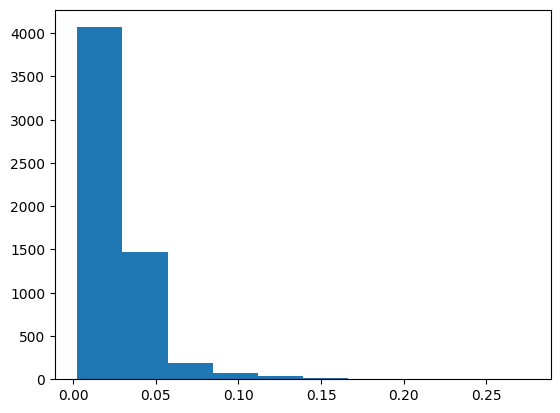

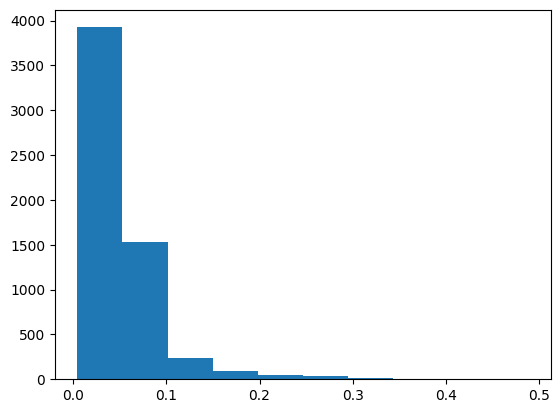

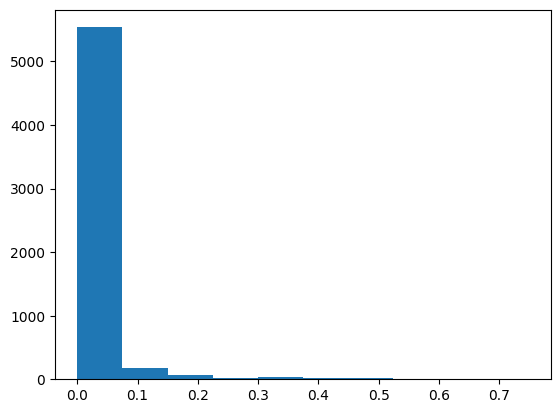

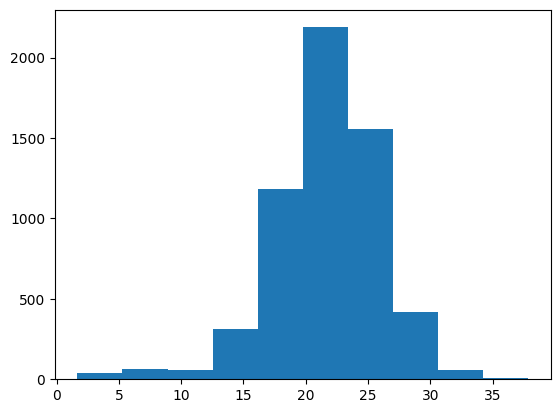

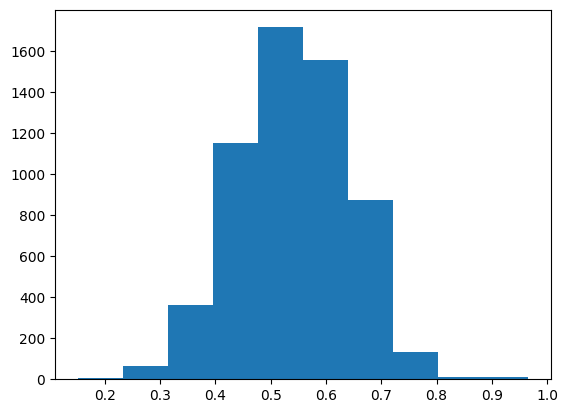

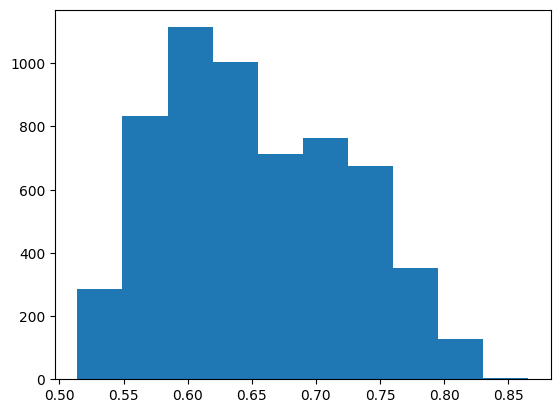

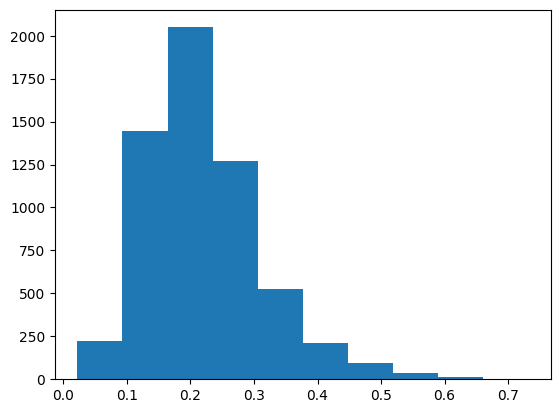

In [ ]:
columns_titles = list(data.columns)
for a in range (21):
  plt.hist(data.iloc[:,1+a])
  plt.title(columns_titles[1+a])
  plt.show()

In [ ]:
for a in range (21):
  print(f'przedział od {min(data.iloc[:,1+a])} do {max(data.iloc[:,a])}')

przedział od 36 do 42
przedział od 0 do 85
przedział od -4.2625 do 1
przedział od 5.0377 do 215.49
przedział od 7.0 do 39.511
przedział od 0.00083 do 54.992
przedział od 2.25e-06 do 0.09999
przedział od 0.00033 do 0.00044559
przedział od 0.00043 do 0.05754
przedział od 0.00098 do 0.06956
przedział od 0.00306 do 0.17263
przedział od 0.026 do 0.26863
przedział od 0.00161 do 2.107
przedział od 0.00194 do 0.16267
przedział od 0.00249 do 0.16702
przedział od 0.00484 do 0.27546
przedział od 0.000286 do 0.48802
przedział od 1.659 do 0.74826
przedział od 0.15102 do 37.875
przedział od 0.51404 do 0.96608
przedział od 0.021983 do 0.8656


In [ ]:
data.shape


(5875, 22)

In [ ]:
data.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [ ]:
#Wyznacznik osoby chorej na parkinsona
data['motor_UPDRS'].value_counts()
data['total_UPDRS'].value_counts()

32.0000    109
19.0000     70
7.0000      54
20.4910     12
26.6180     12
          ... 
27.2910      1
7.1698       1
50.4170      1
29.4580      1
35.4010      1
Name: total_UPDRS, Length: 1129, dtype: int64

In [ ]:
#Deleting useles data
data.drop(columns = ['subject#'],axis = 1,  inplace = True)
selectiveData.drop(columns = ['subject#'],axis = 1,  inplace = True)

In [ ]:
#normalization
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data=scaler.fit_transform(data)

data=pd.DataFrame(data,columns=['age','sex','test_time','motor_UPDRS','total_UPDRS','Jitter(%)','Jitter(Abs)','Jitter:RAP','Jitter:PPQ5','Jitter:DDP','Shimmer','Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','Shimmer:APQ11','Shimmer:DDA','NHR','HNR','RPDE','DFA','PPE'])

In [ ]:
#data['total_UPDRS'] = data['total_UPDRS'].astype('int64')

X = data.drop(columns=['motor_UPDRS','total_UPDRS'],axis=1)
Y=data['total_UPDRS']
Z=data['motor_UPDRS']

XS = data.drop(columns=['motor_UPDRS','total_UPDRS'],axis=1)
YS=data['total_UPDRS']
ZS=data['motor_UPDRS']

In [ ]:
Y.describe()


count    5875.000000
mean        0.458804
std         0.222960
min         0.000000
25%         0.299446
50%         0.428738
75%         0.612581
max         1.000000
Name: total_UPDRS, dtype: float64

In [ ]:
#Train, Test, Valid Data
from sklearn.model_selection import train_test_split

#param for total_UPDRS

XS_train, XS_test, ys_train, ys_test = train_test_split(XS, YS,
    test_size=0.2, shuffle = True, random_state= 8)

# Use the same function above for the validation set
XS_train, XS_val, ys_train, ys_val = train_test_split(XS_train, ys_train,
    test_size=0.25,  random_state= 8) # 0.25 x 0.8 = 0.2

#param motor_UPDRS

XZS_train, XZS_test, ZS_train, ZS_test = train_test_split(XS, ZS,
    test_size=0.2, shuffle = True, random_state= 8)

# Use the same function above for the validation set
XZS_train, XZS_val, ZS_train, ZS_val = train_test_split(XZS_train, ZS_train,
    test_size=0.25,  random_state= 8) # 0.25 x 0.8 = 0.2



In [ ]:
#Train, Test, Valid Data
from sklearn.model_selection import train_test_split

#param for total_UPDRS

X_train, X_test, y_train, y_test = train_test_split(X, Y,
    test_size=0.2, shuffle = True, random_state= 8)

# Use the same function above for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
    test_size=0.25,  random_state= 8) # 0.25 x 0.8 = 0.2

#param motor_UPDRS

XZ_train, XZ_test, Z_train, Z_test = train_test_split(X, Z,
    test_size=0.2, shuffle = True, random_state= 8)

# Use the same function above for the validation set
XZ_train, XZ_val, Z_train, Z_val = train_test_split(XZ_train, Z_train,
    test_size=0.25,  random_state= 8) # 0.25 x 0.8 = 0.2

In [ ]:
model = XGBRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:

model_dict = {
    #'Logistic Regression' : LogisticRegression(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor()
}

model_score = pd.DataFrame()

for curr_model in model_dict:
    model = model_dict[curr_model]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score = model_score.append({  'Model' : curr_model,
                                        'mean_absolute_error' : round(mean_absolute_error(y_test, y_pred),3),
                                        'mean_squared_error' : round(mean_squared_error(y_test, y_pred),3),
                                        'r2_score' : round(r2_score(y_test, y_pred),3),
                                        #'F1 Score' : round(f1_score(y_test, y_pred),3)
                                        }, ignore_index=True)

model_score.head()

,Model,mean_absolute_error,mean_squared_error,r2_score
0,RandomForestRegressor,0.094,0.037,0.963
1,AdaBoostRegressor,0.686,0.621,0.381
2,GradientBoostingRegressor,0.361,0.217,0.784
3,XGBRegressor,0.145,0.050,0.950


In [ ]:

max_accuracy= min(model_score['mean_squared_error'])
best_model = model_score[model_score['mean_squared_error'] == max_accuracy ]['Model'].values[0]
best_model

'RandomForestRegressor'

In [ ]:
model_params = {

    'RandomForestRegressor' : {
        #random forest Parameters
        'n_estimators' : [x*25 + 50 for x in range(1, 8)],
        'max_samples' : [.25,.5,.75],
        'max_features' : ['sqrt', 'log2'],

        #Base Estimator(DT) Parameters
        'criterion' : ['squared_error', 'absolute_error'],
        'max_depth' : [5,7,9,11],
        'min_samples_split' : [15, 20, 25],
        'min_samples_leaf' : [15, 20, 25]
    },
    'AdaBoostRegressor' : {
        'n_estimators' : [x*25 + 50 for x in range(1, 15)],
        'learning_rate' : [0.001, 0.01, 0.05, 0.1, 1,5],
        'loss' : ['linear', 'square']
    },
    'GradientBoostingRegressor' : {
        'learning_rate' : [0.01,0.1,0.5],
        'n_estimators' : [x*25 + 50 for x in range(1, 8)],
        'min_samples_split' : [15,30,50],
        'min_samples_leaf' : [5,10,15,20],
        'max_depth' : [5,7,10],
        'min_impurity_decrease': [0.1, 0.3],
        'max_features': ['sqrt', 'log2']
    },
    'XGBRegressor' : {
        'max_depth' : [5,7,9,11]
    }
}

In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [ ]:
best_model_cv = RandomizedSearchCV(model_dict[best_model], model_params[best_model], cv = 5,n_iter=30, scoring = 'neg_mean_absolute_error')  #RandomSearch
best_model_cv.fit(X_train, y_train)

print('Best Hyper Parameters for {}: \n{}'.format(best_model, best_model_cv.best_params_))
print('Best score for {} using above Hyper Parameters: {}'.format(best_model, best_model_cv.best_score_))

Best Hyper Parameters for RandomForestRegressor: 
{'n_estimators': 75, 'min_samples_split': 25, 'min_samples_leaf': 15, 'max_samples': 0.75, 'max_features': 'log2', 'max_depth': 11, 'criterion': 'absolute_error'}
Best score for RandomForestRegressor using above Hyper Parameters: -0.5519220683492119


In [ ]:
_best_model = model_dict[best_model]
_best_model.fit(X_train,y_train)

y_pred = _best_model.predict(X_test)

#Evaluation Matrix
print(f'mean_absolute_error : {round(mean_absolute_error(y_test, y_pred),3)}')
print(f'mean_squared_error : {round(mean_squared_error(y_test, y_pred),3)}')
print(f'r2_score : {round(r2_score(y_test, y_pred),3)}')

mean_absolute_error : 0.098
mean_squared_error : 0.037
r2_score : 0.963


In [ ]:

model_dict = {
    #'Logistic Regression' : LogisticRegression(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor()
}

model_score = pd.DataFrame()

for curr_model in model_dict:
    model = model_dict[curr_model]
    model.fit(XZ_train, Z_train)
    y_pred = model.predict(XZ_test)
    model_score = model_score.append({  'Model' : curr_model,
                                        'mean_absolute_error' : round(mean_absolute_error(Z_test, y_pred),3),
                                        'mean_squared_error' : round(mean_squared_error(Z_test, y_pred),3),
                                        'r2_score' : round(r2_score(Z_test, y_pred),3),
                                        #'F1 Score' : round(f1_score(y_test, y_pred),3)
                                        }, ignore_index=True)

model_score.head()

,Model,mean_absolute_error,mean_squared_error,r2_score
0,RandomForestRegressor,0.101,0.042,0.959
1,AdaBoostRegressor,0.709,0.619,0.391
2,GradientBoostingRegressor,0.378,0.225,0.778
3,XGBRegressor,0.154,0.053,0.948


In [ ]:
max_accuracy= min(model_score['mean_squared_error'])
best_model = model_score[model_score['mean_squared_error'] == max_accuracy ]['Model'].values[0]
best_model

model_params = {

    'RandomForestRegressor' : {
        #random forest Parameters
        'n_estimators' : [x*25 + 50 for x in range(1, 8)],
        'max_samples' : [.25,.5,.75],
        'max_features' : ['sqrt', 'log2'],

        #Base Estimator(DT) Parameters
        'criterion' : ['squared_error', 'absolute_error'],
        'max_depth' : [5,7,9,11],
        'min_samples_split' : [15, 20, 25],
        'min_samples_leaf' : [15, 20, 25]
    },
    'AdaBoostRegressor' : {
        'n_estimators' : [x*25 + 50 for x in range(1, 15)],
        'learning_rate' : [0.001, 0.01, 0.05, 0.1, 1,5],
        'loss' : ['linear', 'square']
    },
    'GradientBoostingRegressor' : {
        'learning_rate' : [0.01,0.1,0.5],
        'n_estimators' : [x*25 + 50 for x in range(1, 8)],
        'min_samples_split' : [15,30,50],
        'min_samples_leaf' : [5,10,15,20],
        'max_depth' : [5,7,10],
        'min_impurity_decrease': [0.1, 0.3],
        'max_features': ['sqrt', 'log2']
    },
    'XGBRegressor' : {
        'max_depth' : [5,7,9,11]
    }
}

best_model_cv = RandomizedSearchCV(model_dict[best_model], model_params[best_model], cv = 5,n_iter=30, scoring = 'neg_mean_absolute_error')  #RandomSearch
best_model_cv.fit(XZ_train, Z_train)

print('Best Hyper Parameters for {}: \n{}'.format(best_model, best_model_cv.best_params_))
print('Best score for {} using above Hyper Parameters: {}'.format(best_model, best_model_cv.best_score_))

_best_model = model_dict[best_model]
_best_model.fit(XZ_train,Z_train)

y_pred = _best_model.predict(XZ_test)

#Evaluation Matrix
print(f'mean_absolute_error : {round(mean_absolute_error(Z_test, y_pred),3)}')
print(f'mean_squared_error : {round(mean_squared_error(Z_test, y_pred),3)}')
print(f'r2_score : {round(r2_score(Z_test, y_pred),3)}')

Best Hyper Parameters for RandomForestRegressor: 
{'n_estimators': 75, 'min_samples_split': 20, 'min_samples_leaf': 20, 'max_samples': 0.75, 'max_features': 'sqrt', 'max_depth': 11, 'criterion': 'absolute_error'}
Best score for RandomForestRegressor using above Hyper Parameters: -0.5741065490460263
mean_absolute_error : 0.106
mean_squared_error : 0.046
r2_score : 0.954


In [ ]:
#2xplt.plot(y_train,'r--',y_test,'g^')

SyntaxError: ignored

NOT EDITED DATA


In [ ]:
model_dict = {
    #'Logistic Regression' : LogisticRegression(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor()
}

model_score = pd.DataFrame()

for curr_model in model_dict:
    model = model_dict[curr_model]
    model.fit(XS_train, ys_train)
    y_pred = model.predict(XS_test)
    model_score = model_score.append({  'Model' : curr_model,
                                        'mean_absolute_error' : round(mean_absolute_error(ys_test, y_pred),3),
                                        'mean_squared_error' : round(mean_squared_error(ys_test, y_pred),3),
                                        'r2_score' : round(r2_score(ys_test, y_pred),3),
                                        #'F1 Score' : round(f1_score(y_test, y_pred),3)
                                        }, ignore_index=True)

model_score.head()

,Model,mean_absolute_error,mean_squared_error,r2_score
0,RandomForestRegressor,0.100,0.040,0.961
1,AdaBoostRegressor,0.699,0.636,0.366
2,GradientBoostingRegressor,0.360,0.216,0.785
3,XGBRegressor,0.145,0.050,0.950


In [ ]:
max_accuracy= min(model_score['mean_squared_error'])
best_model = model_score[model_score['mean_squared_error'] == max_accuracy ]['Model'].values[0]
best_model

model_params = {

    'RandomForestRegressor' : {
        #random forest Parameters
        'n_estimators' : [x*25 + 50 for x in range(1, 8)],
        'max_samples' : [.25,.5,.75],
        'max_features' : ['sqrt', 'log2'],

        #Base Estimator(DT) Parameters
        'criterion' : ['squared_error', 'absolute_error'],
        'max_depth' : [5,7,9,11],
        'min_samples_split' : [15, 20, 25],
        'min_samples_leaf' : [15, 20, 25]
    },
    'AdaBoostRegressor' : {
        'n_estimators' : [x*25 + 50 for x in range(1, 15)],
        'learning_rate' : [0.001, 0.01, 0.05, 0.1, 1,5],
        'loss' : ['linear', 'square']
    },
    'GradientBoostingRegressor' : {
        'learning_rate' : [0.01,0.1,0.5],
        'n_estimators' : [x*25 + 50 for x in range(1, 8)],
        'min_samples_split' : [15,30,50],
        'min_samples_leaf' : [5,10,15,20],
        'max_depth' : [5,7,10],
        'min_impurity_decrease': [0.1, 0.3],
        'max_features': ['sqrt', 'log2']
    },
    'XGBRegressor' : {
        'max_depth' : [5,7,9,11]
    }
}

best_model_cv = RandomizedSearchCV(model_dict[best_model], model_params[best_model], cv = 5,n_iter=30, scoring = 'neg_mean_absolute_error')  #RandomSearch
best_model_cv.fit(XS_train, ys_train)

print('Best Hyper Parameters for {}: \n{}'.format(best_model, best_model_cv.best_params_))
print('Best score for {} using above Hyper Parameters: {}'.format(best_model, best_model_cv.best_score_))

_best_model = model_dict[best_model]
_best_model.fit(XZ_train,ys_train)

y_pred = _best_model.predict(XS_test)

#Evaluation Matrix
print(f'mean_absolute_error : {round(mean_absolute_error(ys_test, y_pred),3)}')
print(f'mean_squared_error : {round(mean_squared_error(ys_test, y_pred),3)}')
print(f'r2_score : {round(r2_score(ys_test, y_pred),3)}')

Best Hyper Parameters for RandomForestRegressor: 
{'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_samples': 0.75, 'max_features': 'log2', 'max_depth': 11, 'criterion': 'squared_error'}
Best score for RandomForestRegressor using above Hyper Parameters: -0.5569561310224437
mean_absolute_error : 0.093
mean_squared_error : 0.036
r2_score : 0.964


In [ ]:
model_dict = {
    #'Logistic Regression' : LogisticRegression(),
    'RandomForestRegressor' : RandomForestRegressor(),
    'AdaBoostRegressor' : AdaBoostRegressor(),
    'GradientBoostingRegressor' : GradientBoostingRegressor(),
    'XGBRegressor' : XGBRegressor()
}

model_score = pd.DataFrame()

for curr_model in model_dict:
    model = model_dict[curr_model]
    model.fit(XZS_train, ZS_train)
    y_pred = model.predict(XZS_test)
    model_score = model_score.append({  'Model' : curr_model,
                                        'mean_absolute_error' : round(mean_absolute_error(ZS_test, y_pred),3),
                                        'mean_squared_error' : round(mean_squared_error(ZS_test, y_pred),3),
                                        'r2_score' : round(r2_score(ZS_test, y_pred),3),
                                        #'F1 Score' : round(f1_score(y_test, y_pred),3)
                                        }, ignore_index=True)

model_score.head()

max_accuracy= min(model_score['mean_squared_error'])
best_model = model_score[model_score['mean_squared_error'] == max_accuracy ]['Model'].values[0]
best_model

model_params = {

    'RandomForestRegressor' : {
        #random forest Parameters
        'n_estimators' : [x*25 + 50 for x in range(1, 8)],
        'max_samples' : [.25,.5,.75],
        'max_features' : ['sqrt', 'log2'],

        #Base Estimator(DT) Parameters
        'criterion' : ['squared_error', 'absolute_error'],
        'max_depth' : [5,7,9,11],
        'min_samples_split' : [15, 20, 25],
        'min_samples_leaf' : [15, 20, 25]
    },
    'AdaBoostRegressor' : {
        'n_estimators' : [x*25 + 50 for x in range(1, 15)],
        'learning_rate' : [0.001, 0.01, 0.05, 0.1, 1,5],
        'loss' : ['linear', 'square']
    },
    'GradientBoostingRegressor' : {
        'learning_rate' : [0.01,0.1,0.5],
        'n_estimators' : [x*25 + 50 for x in range(1, 8)],
        'min_samples_split' : [15,30,50],
        'min_samples_leaf' : [5,10,15,20],
        'max_depth' : [5,7,10],
        'min_impurity_decrease': [0.1, 0.3],
        'max_features': ['sqrt', 'log2']
    },
    'XGBRegressor' : {
        'max_depth' : [5,7,9,11]
    }
}

best_model_cv = RandomizedSearchCV(model_dict[best_model], model_params[best_model], cv = 5,n_iter=30, scoring = 'neg_mean_absolute_error')  #RandomSearch
best_model_cv.fit(XZS_train, ZS_train)
best_model_cv.
print('Best Hyper Parameters for {}: \n{}'.format(best_model, best_model_cv.best_params_))
print('Best score for {} using above Hyper Parameters: {}'.format(best_model, best_model_cv.best_score_))

_best_model = model_dict[best_model]
_best_model.fit(XZS_train,ZS_train)

y_pred = _best_model.predict(XZS_test)

#Evaluation Matrix
print(f'mean_absolute_error : {round( (ZS_test, y_pred),3)}')
print(f'mean_squared_error : {round(mean_squared_error(ZS_test, y_pred),3)}')
print(f'r2_score : {round(r2_score(ZS_test, y_pred),3)}')

Best Hyper Parameters for RandomForestRegressor: 
{'n_estimators': 150, 'min_samples_split': 25, 'min_samples_leaf': 15, 'max_samples': 0.75, 'max_features': 'log2', 'max_depth': 11, 'criterion': 'absolute_error'}
Best score for RandomForestRegressor using above Hyper Parameters: -0.5529991959263253
mean_absolute_error : 0.097
mean_squared_error : 0.038
r2_score : 0.962
